In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from scipy.stats import trim_mean, boxcox, chi2_contingency
import warnings
from datetime import datetime

In [2]:
warnings.filterwarnings('ignore')
print(f'Início: {str(datetime.now().strftime('%Y-%m-%d'))}')

Início: 2025-08-06


In [3]:
df = pd.read_csv('./csv files/airlines_flights_data.csv', encoding='utf-8', na_values=False)
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,NaN,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1.0,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3.0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
def drop_column(x:pd.DataFrame):
    df = x.copy()
    if hasattr(df, 'drop') and np.absolute(df.isna().sum()).any() > 0:
        if 'index' in df.columns:
             df = df.drop(['index'], axis=1)

    return df

In [6]:
df = drop_column(df)

In [7]:
pd.Series(df.iloc[3:8]['duration'])

3    2.25
4    2.33
5    2.33
6    2.08
7    2.17
Name: duration, dtype: float64

### Distribuição - tempo de duração dos voos

In [8]:
hist = np.histogram(df['duration'], bins=10)
hist

(array([55884, 83952, 77438, 34379, 29397, 16993,  1700,   362,    40,
            8], dtype=int64),
 array([ 0.83,  5.73, 10.63, 15.53, 20.43, 25.33, 30.23, 35.13, 40.03,
        44.93, 49.83]))

In [9]:
import math
x_size, = df.shape[0] * math.floor(trim_mean(df['duration'], 0.1)) / 100,
x_size = int(x_size)

In [10]:
x_sample = df.sample(x_size)
x_sample.shape

(33016, 11)

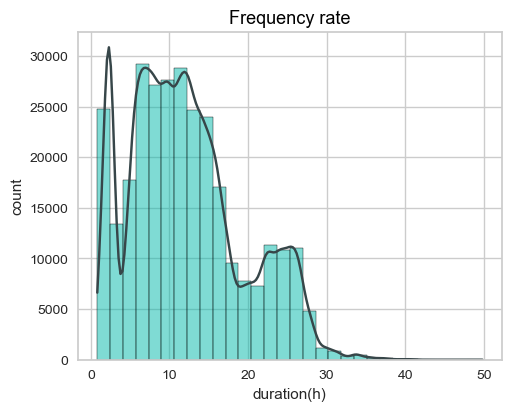

In [11]:
from matplotlib.pylab import rcParams
from matplotlib.collections import LineCollection

fig_params = rcParams['figure.figsize'] = [5, 4]
dict_font = {
    'fontsize': 13,
    'fontfamily': 'Arial',
    'color': 'black'
}

#points = np.array([x_grid, kde_values]).T.reshape(-1, 1, 2)
fig, ax = plt.subplots(figsize=(*fig_params,), layout='constrained')
sns.histplot(df['duration'].values, bins=30, kde=True, color='#01B8AA', ax=ax,
                 ) \
            .set_title(f'Frequency rate', fontdict=dict_font)

ax.lines[0].set_color('#374649')
plt.legend().set_visible(True)
plt.xlabel(f'duration(h)')
plt.ylabel(f'count')

plt.show()

1. Quais as companhias aéreas do conjunto de dados, acompanhadas de suas frequências

In [12]:
df_departure = df.groupby(['departure_time']).size().sort_values(ascending=False)
df_departure

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
dtype: int64

In [13]:
df_arrival = df.groupby(['arrival_time']).size().sort_values(ascending=False)
df_arrival

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
dtype: int64

2. Construir gráfico de barras, representando __Departure Time__ e __Arrival Time__ 

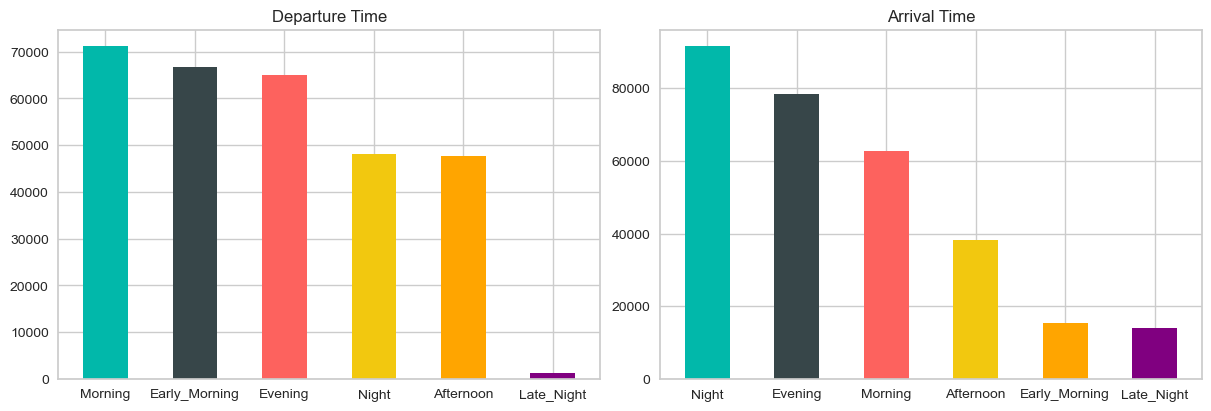

In [14]:
from sklearn.utils import resample
new_sample = resample(df, n_samples=1000, replace=False)

departure = ['Morning', 'Early_Morning', 'Evening', 'Night', 'Afternoon', 'Late_Night']
arrival = ['Night', 'Evening', 'Morning', 'Afternoon', 'Early_Morning', 'Late_Night']

color_dep = {
    departure[0]: '#01B8AA',
    departure[1]: '#374649',
    departure[2]: '#FD625E',
    departure[3]: '#F2C80F',
    departure[4]: 'orange',
    departure[5]: 'purple'
}

color_arr = {
    arrival[0]: '#01B8AA',
    arrival[1]: '#374649',
    arrival[2]: '#FD625E',
    arrival[3]: '#F2C80F',
    arrival[4]: 'orange',
    arrival[5]: 'purple'
}
colors_dep = [color_dep[cat] for cat in departure]
colors_arr = [color_arr[cat] for cat in arrival]

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), layout='constrained')
ax = axes[0]
bar1 = ax.bar(departure, df_departure, color=colors_dep, width=0.5)
ax.set_title(f'Departure Time')
plt.xlabel('')

ax = axes[1]
bar2 = ax.bar(arrival, df_arrival, color=colors_arr, width=0.5)
ax.set_title(f'Arrival Time')
plt.show()

In [15]:
df_source_city = df.groupby(['source_city']).size().sort_values(ascending=False)
df_source_city

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
dtype: int64

In [16]:
df_destination_city = df.groupby(['destination_city']).size().sort_values(ascending=False)
df_destination_city

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
dtype: int64

3. Construa gráfico de barras, mostrando __Cidade de origem__ e __Cidade de Destino__

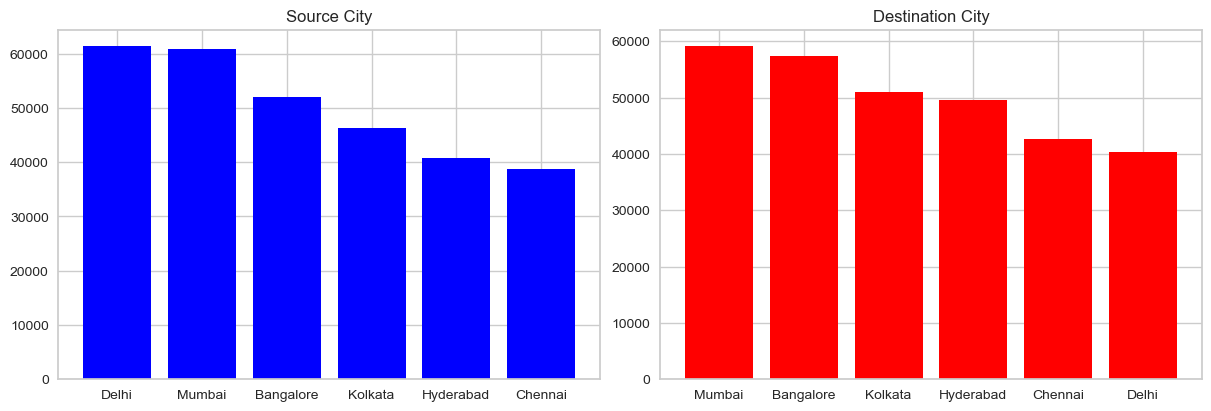

In [17]:
xlabels_source = df['source_city'].unique()
xlabels_destination = df['destination_city'].unique()

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), layout='constrained')
ax = axes[0]
bar_source = ax.bar(xlabels_source, df_source_city, color='blue')
ax.set_title(f'Source City')
plt.xlabel('')

ax = axes[1]
bar_destiny = ax.bar(xlabels_destination, df_destination_city, color='red')
ax.set_title(f'Destination City')
plt.xlabel('')

plt.show()

4. Analisar se o preço varia entre as linhas aéreas

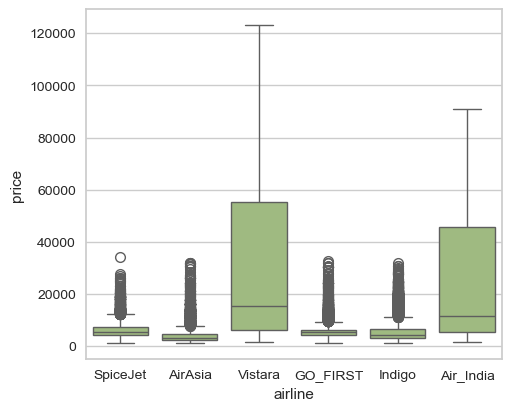

In [18]:
fig, ax = plt.subplots(figsize=(5, 4), layout='constrained')
sns.boxplot(x=df['airline'], y=df['price'], color='g', ax=ax)

plt.show()

In [103]:
df['price'].describe().apply(lambda x: format(x, 'f'))

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: object

In [21]:
import statsmodels.formula.api as smf
import random

model = smf.ols('price ~ airline', data=df).fit()
#var_anova = smf.stats.anova_lm(model, typ=2)
sample_var = np.var(df['price'], ddof=1)

def get_perm_sample(x:pd.DataFrame, conjA, conjB):
    n = conjA + conjB
    idx_b = set(random.sample(range(n), conjB))
    idx_a = set(range(conjA)) - idx_b
    return x.loc[list(idx_b)], x.loc[list(idx_a)]

In [23]:
sample_var

515188643.4044994

5. O preço das passagens mudam conforme o **horário de partida** e o **horário de chegada**?

In [29]:
var_airline_price = df.groupby(['airline'])['price'].mean()
var_airline_price

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [35]:
var_departure_arrival_price = df.groupby(['departure_time', 'arrival_time']).agg({
    'price': 'mean'
})
var_departure_arrival_price

price
departure_time arrival_time               
Afternoon      Afternoon      14741.746011
               Early_Morning  21159.511401
               Evening        15548.836651
               Late_Night     10811.615662
               Morning        26056.580994
               Night          19097.798757
Early_Morning  Afternoon      16564.731082
               Early_Morning   9540.191523
               Evening        24804.077441
               Late_Night     29638.037500
               Morning        12299.838792
               Night          25792.007764
Evening        Afternoon      25569.672277
               Early_Morning  18175.929529
               Evening        24612.547643
               Late_Night      8547.029235
               Morning        28326.216482
               Night          15641.705242
Late_Night     Afternoon      18520.684932
               Early_Morning   4548.700599
               Evening        21217.106383
               Late_Night      4288.291971
               Morning         7104.374684
               Night          29439.811321
Morning        Afternoon      13271.433547
               Early_Morning  22625.786578
               Evening        21636.529952
               Late_Night     23624.505755
               Morning        17548.738563
               Night          26827.897551
Night          Afternoon      28115.362126
               Early_Morning  12075.785461
               Evening        31425.824194
               Late_Night      6590.831766
               Morning        25573.642137
               Night          17817.956009

6. Como os preços são afetados quando as passagens são adquiridas **1** ou **2** dias antes da partida?

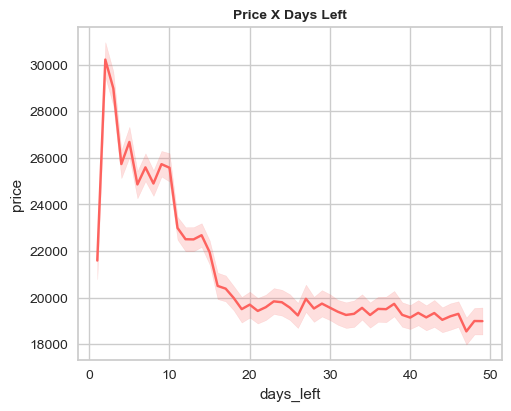

In [62]:
fig, ax = plt.subplots(figsize=(5, 4), layout='constrained')
sns.lineplot(df, x='days_left', y='price', ax=ax, color='#FD625E')

ax.set_title(f'Price X Days Left', fontweight='bold', fontsize=10)
ax.set_axis_on()

plt.show()

7. Como que o preço varia entre a classe __econômica__ e __executiva__?

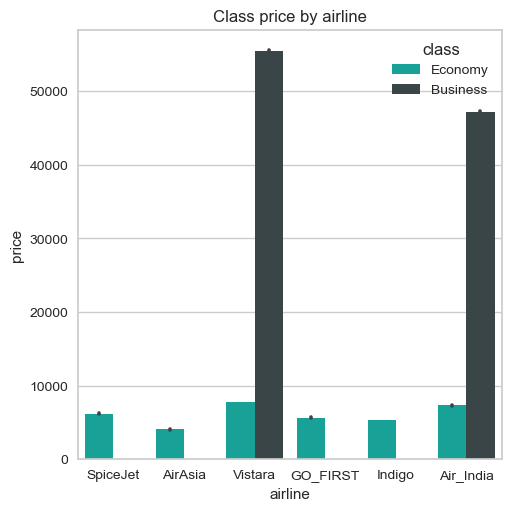

In [74]:
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
sns.barplot(df, x='airline', y='price', hue='class', palette=['#01B8AA', '#374649'], ax=ax)

ax.set_title(f'Class price by airline', fontweight='bold', fontsize=10)
plt.show()

8. Qual será o preço médio da linha aérea **Vistara** para um voo de **Delhi** para **Hyderabad**
em classe executiva?

In [87]:
mean_price_vistara = df[(df['airline'] == 'Vistara') & (df['source_city'] == 'Delhi') & 
                        (df['destination_city'] == 'Hyderabad') & 
                        (df['class'] == 'Business')]['price'].mean().astype(int)

print(f'Preço médio de Delhi para Hyderabad pela companhia Vistara: {mean_price_vistara}')

Preço médio de Delhi para Hyderabad pela companhia Vistara: 47939


In [99]:
df.groupby(['airline', 'flight']).filter(lambda x: len(x) > 1).loc[lambda x: x['duration'].isnull()].index

Index([], dtype='int64')